In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate dataset with 100 samples
n_samples = 100

# Features
response_accuracy = np.random.choice([0, 1], size=n_samples)  # 0 = wrong, 1 = correct
time_taken = np.random.uniform(5, 60, size=n_samples)  # Time in seconds
question_type = np.random.choice([0, 1, 2], size=n_samples)  # 0 = easy, 1 = medium, 2 = hard
completion_status = np.random.choice([0, 1], size=n_samples)  # 0 = incomplete, 1 = complete
assistance_needed = np.random.choice([0, 1], size=n_samples)  # 0 = no assistance, 1 = assistance needed

# Target Variables
skill_level = np.clip(response_accuracy * 0.8 + (1 - (time_taken / 60)) * 0.2, 0, 1)  # Normalized skill level
assistance_needed_binary = assistance_needed  # Binary output
difficulty_recommendation = np.clip(question_type + response_accuracy - assistance_needed, 1, 3)  # Difficulty

# Create DataFrame
data = pd.DataFrame({
    'response_accuracy': response_accuracy,
    'time_taken': time_taken,
    'question_type': question_type,
    'completion_status': completion_status,
    'assistance_needed': assistance_needed,
    'skill_level': skill_level,
    'assistance_needed_binary': assistance_needed_binary,
    'difficulty_recommendation': difficulty_recommendation
})

# Save to CSV
data.to_csv('student_performance_dataset.csv', index=False)

print("Dataset generated and saved as 'student_performance_dataset.csv'")


Dataset generated and saved as 'student_performance_dataset.csv'


In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('student_performance_dataset.csv')

# Display first few rows to understand the structure
print(data.head())


   response_accuracy  time_taken  question_type  completion_status  \
0                  0   58.327155              0                  1   
1                  1   47.632305              0                  0   
2                  0   56.672442              2                  0   
3                  0   54.215504              1                  1   
4                  0   37.884499              1                  1   

   assistance_needed  skill_level  assistance_needed_binary  \
0                  1     0.005576                         1   
1                  0     0.841226                         0   
2                  1     0.011092                         1   
3                  1     0.019282                         1   
4                  1     0.073718                         1   

   difficulty_recommendation  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  


In [ ]:
# Features
X = data[['response_accuracy', 'time_taken', 'question_type', 'completion_status', 'assistance_needed']]
# Targets
y = data[['skill_level', 'assistance_needed_binary', 'difficulty_recommendation']]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale features and targets
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(y_train.shape[1], activation='linear')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
2/2 [==============================] - 1s 150ms/step - loss: 0.4367 - mae: 0.5207 - val_loss: 0.3744 - val_mae: 0.4762
Epoch 2/100
2/2 [==============================] - 0s 35ms/step - loss: 0.3909 - mae: 0.4917 - val_loss: 0.3349 - val_mae: 0.4532
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 0.3512 - mae: 0.4659 - val_loss: 0.3000 - val_mae: 0.4313
Epoch 4/100
2/2 [==============================] - 0s 36ms/step - loss: 0.3188 - mae: 0.4433 - val_loss: 0.2721 - val_mae: 0.4120
Epoch 5/100
2/2 [==============================] - 0s 38ms/step - loss: 0.2880 - mae: 0.4219 - val_loss: 0.2490 - val_mae: 0.3956
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 0.2636 - mae: 0.4034 - val_loss: 0.2276 - val_mae: 0.3813
Epoch 7/100
2/2 [==============================] - 0s 37ms/step - loss: 0.2417 - mae: 0.3882 - val_loss: 0.2066 - val_mae: 0.3663
Epoch 8/100
2/2 [==============================] - 0s 35ms/step - loss: 0.2205 - mae: 0.3

In [ ]:
# Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


1/1 [==============================] - 0s 27ms/step - loss: 0.0065 - mae: 0.0551
Test Loss: 0.0065301209688186646, Test MAE: 0.055097322911024094


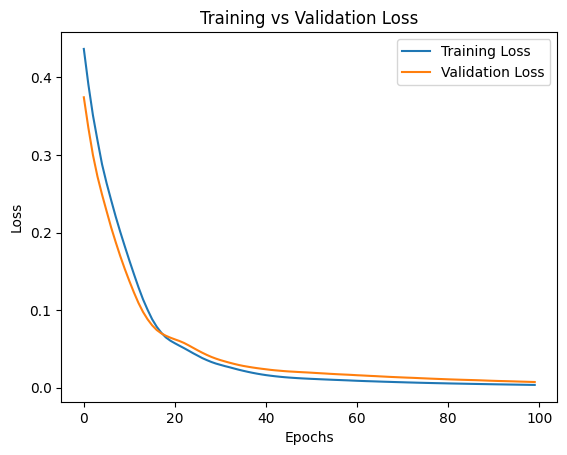

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
# Predict on test data
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
y_pred_original = scaler_y.inverse_transform(predictions)
y_test_original = scaler_y.inverse_transform(y_test)

# Display predictions vs actuals
import pandas as pd

comparison = pd.DataFrame({
    'Actual_Skill_Level': y_test_original[:, 0],
    'Predicted_Skill_Level': y_pred_original[:, 0],
    'Actual_Assistance': y_test_original[:, 1],
    'Predicted_Assistance': y_pred_original[:, 1],
    'Actual_Difficulty': y_test_original[:, 2],
    'Predicted_Difficulty': y_pred_original[:, 2],
})

print(comparison.head())


1/1 [==============================] - 0s 57ms/step
   Actual_Skill_Level  Predicted_Skill_Level  Actual_Assistance  \
0            0.921437               0.793296                0.0   
1            0.890095               0.806949                0.0   
2            0.835303               0.841030                1.0   
3            0.892804               0.898635                1.0   
4            0.841989               0.878455                0.0   

   Predicted_Assistance  Actual_Difficulty  Predicted_Difficulty  
0              0.149781                1.0              1.403701  
1              0.142425                1.0              1.422727  
2              1.017237                2.0              1.659209  
3              1.032653                1.0              1.195355  
4             -0.055864                3.0              2.907329  


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 0.08501291001526735
Root Mean Squared Error: 0.14012561784404395


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Binary outputs for assistance
actual_binary = (y_test_original[:, 1] > 0.5).astype(int)
predicted_binary = (y_pred_original[:, 1] > 0.5).astype(int)

accuracy = accuracy_score(actual_binary, predicted_binary)
f1 = f1_score(actual_binary, predicted_binary)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 1.0
F1 Score: 1.0


In [ ]:
model.save('student_performance_model.h5')
print("Model saved as 'student_performance_model.h5'")


Model saved as 'student_performance_model.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('student_performance_model.h5')


In [ ]:
# Normalize new data using the same scaler
new_data = np.array([[1, 10, 0, 0, 0]])  # Example new data
new_data_scaled = scaler_X.transform(new_data)

# Predict using the loaded model
new_prediction = loaded_model.predict(new_data_scaled)
new_prediction_original = scaler_y.inverse_transform(new_prediction)
print(f"Predicted Performance Analysis: {new_prediction_original}")


1/1 [==============================] - 0s 24ms/step
Predicted Performance Analysis: [[0.77044874 0.12479383 1.5080094 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
def map_predictions(predicted_output):
    skill_level = 'Advanced' if predicted_output[0][0] > 0.7 else (
                  'Intermediate' if predicted_output[0][0] > 0.5 else 'Beginner')
    assistance_needed = 'Yes' if predicted_output[0][1] >= 1 else 'No'
    recommended_difficulty = round(predicted_output[0][2])

    return {
        'Skill Level': skill_level,
        'Assistance Needed': assistance_needed,
        'Recommended Difficulty': recommended_difficulty
    }

mapped_output = map_predictions(new_prediction_original)
print(mapped_output)


{'Skill Level': 'Advanced', 'Assistance Needed': 'No', 'Recommended Difficulty': 2}
